In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving garments_worker_productivity.csv to garments_worker_productivity.csv


In [ ]:
import pandas as pd
import numpy as np
df_gwp = pd.read_csv('garments_worker_productivity.csv')

In [ ]:
#First 5 rows
df_gwp.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
#Get the type in each column.
df_gwp.dtypes

date                     datetime64[ns]
quarter                          object
department                       object
day                              object
team                              int64
targeted_productivity           float64
smv                             float64
wip                             float64
over_time                         int64
incentive                         int64
idle_time                       float64
idle_men                          int64
no_of_style_change                int64
no_of_workers                   float64
actual_productivity             float64
dtype: object

In [ ]:
#Change date column to datetime
df_gwp['date'] = pd.to_datetime(df_gwp['date'], format='%m/%d/%Y')

In [ ]:
#From the above, we see the wip column has NaN values. We will check how many Null/NaN values in all columns. 
#Check if there are any null values or NaN values

#No null values
for col in df_gwp.columns:
  print(col + ":",sum(df_gwp[col].isnull()))

date: 0
quarter: 0
department: 0
day: 0
team: 0
targeted_productivity: 0
smv: 0
wip: 506
over_time: 0
incentive: 0
idle_time: 0
idle_men: 0
no_of_style_change: 0
no_of_workers: 0
actual_productivity: 0


In [ ]:
#The column wip has missing values, hence replace that with the median

#Median Value
print("Median value:",df_gwp['wip'].median()) 

Median value: 1039.0


In [ ]:
#Replace with median value
df_gwp['wip']=df_gwp['wip'].fillna(df_gwp['wip'].median())
df_gwp

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,Quarter2,finishing,Wednesday,10,0.75,2.90,1039.0,960,0,0.0,0,0,8.0,0.628333
1193,2015-03-11,Quarter2,finishing,Wednesday,8,0.70,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1194,2015-03-11,Quarter2,finishing,Wednesday,7,0.65,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1195,2015-03-11,Quarter2,finishing,Wednesday,9,0.75,2.90,1039.0,1800,0,0.0,0,0,15.0,0.505889


In [ ]:
#We might like to look at some statistics by month, hence we will create a separate month column

df_gwp.insert(0, 'month',  df_gwp['date'].dt.month)  
df_gwp.head()

,month,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,1,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
#The definition of quarter in this dataset is a little different. Its not useful,
#hence, in this dataset, we show why it is not useful, and hence wont be using
#it for now.

#There are 5 quarters
print(df_gwp['quarter'].unique())
print('\n')

#How many months inside each quarter? Differs by quarter
df_gwp_quarter=df_gwp.groupby(['quarter'])
print(df_gwp_quarter['month'].unique())
print('\n')

#How many days inside each quarter? Differs by quarter
for i in df_gwp_quarter.groups.keys():
  print(i,":",sorted(df_gwp_quarter.get_group(i)['date'].dt.day.unique()))

#So, Quarter1 is defined as days 1-7 for Jan, Feb, March. Quarter 2 is defined
#as days 8-14 for Jan, Feb,March. Quarter3 is days 15-21 for Jan and Feb.
#Quarter 4 is days 22-28 for Jan and Feb. Quarter 5 is days 29 and 31 for Jan.
#These values for day and month differ because we only have data upto March 11th.


['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']


quarter
Quarter1    [1, 2, 3]
Quarter2    [1, 2, 3]
Quarter3       [1, 2]
Quarter4       [1, 2]
Quarter5          [1]
Name: month, dtype: object


Quarter1 : [1, 2, 3, 4, 5, 6, 7]
Quarter2 : [8, 9, 10, 11, 12, 13, 14]
Quarter3 : [15, 16, 17, 18, 19, 20, 21]
Quarter4 : [22, 23, 24, 25, 26, 27, 28]
Quarter5 : [29, 31]


In [ ]:
df_gwp.columns

Index(['month', 'date', 'quarter', 'department', 'day', 'team',
       'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity'],
      dtype='object')

-0.05420583714002143

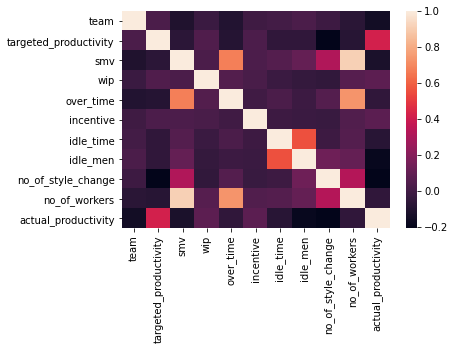

In [ ]:
#Correlation heat map of relevant numeric variables

df_gwp_numeric=df_gwp[['team','targeted_productivity','smv','wip','over_time','incentive','idle_time','idle_men','no_of_style_change','no_of_workers','actual_productivity']]
ax = sns.heatmap(df_gwp_numeric.corr())

df_gwp['over_time'].corr(df_gwp['actual_productivity'])




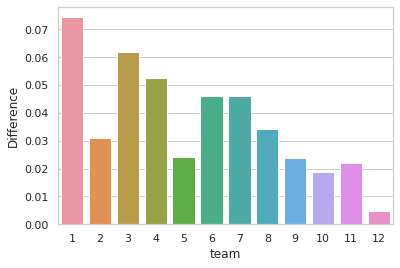

In [ ]:
#Average difference between targeted and actual productivity by team
#Team 12 is the lowest

sns.set_theme(style="whitegrid")

df_gwp_teams = abs(df_gwp.groupby('team')['actual_productivity'].mean()-df_gwp.groupby('team')['targeted_productivity'].mean())
df_gwp_teams=df_gwp_teams.reset_index()

ax = sns.barplot(x=df_gwp_teams['team'],y=df_gwp_teams[0])
ax.set(ylabel='Difference')
plt.show()

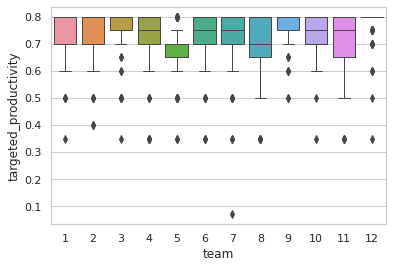

In [ ]:
#Scatter plot of targeted productivity versus actual productivity by team
#Interestingly, some teams have very low targeted productivity

sns.boxplot(x='team', y='targeted_productivity', data=df_gwp, width = 0.8, 
            linewidth = 1)

#sns.scatterplot(data = df_gwp, x='targeted_productivity', y='actual_productivity', hue = 'team')

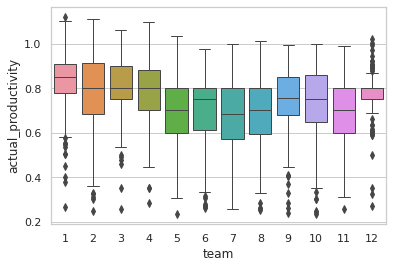

In [ ]:
#Box plot of actual productivity by team

sns.boxplot(x='team', y='actual_productivity', data=df_gwp, width = 0.8, 
            linewidth = 1)

Looking at the above two plots, we can see that the reason why Team 1 has the highest mean difference is because there is a large variation for its values across actual_productivity and targeted_productivity. For Team 12, even though it has outliers, the majority of values are all clustered close to each other, hence there is not too much variation, resulting in the smallest difference.


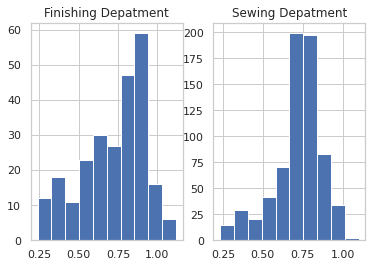

In [ ]:
# Histogram of actual_productivity by deparment aggregated across all teams.
#Roughly the same distribution, with roughly the same mean


plt.subplot(1, 2, 1)
plt.hist(df_gwp[df_gwp['department']=='finishing']['actual_productivity'])
plt.title('Finishing Depatment')
plt.subplot(1, 2, 2)
plt.title('Sewing Depatment')
plt.hist(df_gwp[df_gwp['department']=='sweing']['actual_productivity'])

plt.show()



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Scatter plot between number of workes')

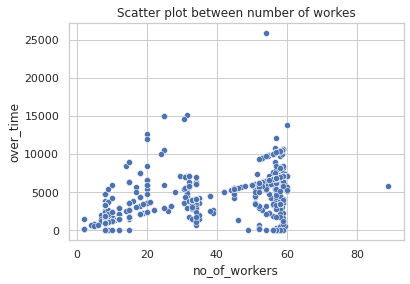

In [ ]:
#Scatter plot between overtime and no. of workers. Increasing number of workers
#does mean that more will end up working overtime, however, this doesn't result
#in increased productivity as seen in the heat map.

ax=sns.scatterplot(df_gwp['no_of_workers'],df_gwp['over_time'])
ax.set_title('Scatter plot between number of workes')
#df_gwp['over_time'] = np.where(df_gwp['over_time'] >= str(2000), '>= 2000', '< 2000')
#df_gwp

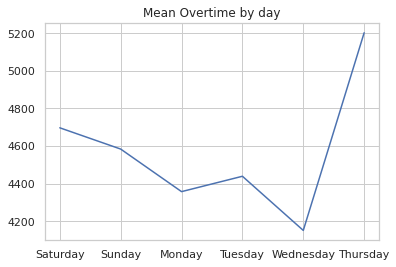

In [ ]:
#Line plot of mean overtime by day

days=['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday']
df_gwp_day = df_gwp.groupby(['day'])
df_gwp_overtime=df_gwp_day['over_time'].mean()[days].reset_index()
plt.title('Mean Overtime by day')
plt.plot(df_gwp_overtime['day'],df_gwp_overtime['over_time'])





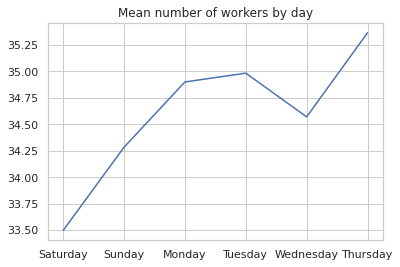

In [ ]:
#Line plot of mean number of workers by day
#Interestingly, as the number of workers increases, overtime decreases
#initally, and then sharply increases at the very last day.

df_gwp_workers=df_gwp_day['no_of_workers'].mean()[days].reset_index()
plt.plot(df_gwp_workers['day'],df_gwp_workers['no_of_workers'])
plt.title('Mean number of workers by day')
plt.show()



From the heatmap, we know there is a correlation between no_of_workers and overtime. From the scatterplot, we see that there is a general increase in overtime as number of workers increase. However, when we break this down looking at the above two line plots, the correlation is somewhat the opposite suggested by the heatmap, i.e. while there is a sharp increase at the end, as the number of workers increases, the overtime put in decreases.